In [1]:
@title 구글드라이브 연동

colab 환경시 사용
from google.colab import drive
drive.mount('/content/drive')

import json
import os
from pprint import pprint

base_data_dir = '/content/drive/MyDrive/ai05/ai05-level1-project'
train_annotations_dir = os.path.join(base_data_dir, 'train_annotations')

json_file_paths = []

for root, dirs, files in os.walk(train_annotations_dir):
    for file_name in files:
        if file_name.endswith('.json'):
            full_path = os.path.join(root, file_name)
            json_file_paths.append(full_path)

print(f"총 JSON 파일 수: {len(json_file_paths)}개")
print("첫 번째 JSON 파일 경로 (예시):")
if json_file_paths:
    print(f"{json_file_paths[0]}")


SyntaxError: invalid syntax (934561678.py, line 7)

In [5]:
# @title JSON 파일 경로 리스트 저장 (다음 실행 시 시간 절약)
import pickle # 파이썬 객체를 파일로 저장하고 불러올 수 있게 하는 모듈

path_list_save_path = os.path.join(base_data_dir, 'json_paths.pkl')

with open(path_list_save_path, 'wb') as f:
    pickle.dump(json_file_paths, f)

print(f"JSON 파일 경로 리스트가  저장되었습니다: {path_list_save_path}")

JSON 파일 경로 리스트가  저장되었습니다: /content/drive/MyDrive/ai05/ai05-level1-project/json_paths.pkl


In [6]:
# @title JSON 파일 경로 리스트 불러오기 (빠른 로딩)
import pickle

path_list_save_path = os.path.join(base_data_dir, 'json_paths.pkl')

with open(path_list_save_path, 'rb') as f:
    loaded_json_file_paths = pickle.load(f)

print(f"저장된 파일 경로 리스트를 불러왔습니다. 총 {len(loaded_json_file_paths)}개")

저장된 파일 경로 리스트를 불러왔습니다. 총 4526개


In [7]:
# @title 모든 JSON 파일 파싱 및 데이터프레임 생성

import json
import pandas as pd
import os
from pprint import pprint

if 'json_file_paths' not in globals() or not json_file_paths:
    print("json 파일이 정의되지 않았습니다")
else:
    parsed_data = []

    print(f"총 {len(json_file_paths)}개의 JSON 파일을 파싱합니다.")

    for file_path in json_file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)

            image_info = data['images'][0]
            file_name = image_info['file_name']
            image_width = image_info['width']
            image_height = image_info['height']

            annotations = data.get('annotations', [])

            for ann in annotations:
                bbox = ann['bbox']
                category_id = ann['category_id']

                parsed_data.append({
                    'image_file_name': file_name,
                    'category_id': category_id,
                    'bbox_x': bbox[0],
                    'bbox_y': bbox[1],
                    'bbox_w': bbox[2],
                    'bbox_h': bbox[3],
                    'image_width': image_width,
                    'image_height': image_height
                })

        except Exception as e:
            print('예외 발생')
            pass

    df = pd.DataFrame(parsed_data)

    print("\n 데이터 파싱 완료 및 DataFrame 정보")
    print(f"총 {len(df)}개의 알약 객체(Row)를 추출했습니다.")
    df.info()
    print("\n 상위 5개 데이터 미리보기:")
    print(df.head())

총 4526개의 JSON 파일을 파싱합니다.


KeyboardInterrupt: 

PC 환경

In [41]:
# @title 로컬 경로 설정 및 JSON 파일 경로 수집

import os
import time

# Mac 로컬 환경의 데이터 기본 경로 설정
base_data_dir = '/Users/bellboi/data/ai05-level1-project'
train_annotations_dir = os.path.join(base_data_dir, 'train_annotations') # train_annotations 폴더 경로

json_file_paths = [] # 모든 JSON 파일의 경로를 저장할 리스트

print(f"로컬 데이터 경로 설정 완료: {base_data_dir}")

start_time = time.time()

if os.path.exists(train_annotations_dir):
    for root, dirs, files in os.walk(train_annotations_dir):
        for file_name in files:
            if file_name.endswith('.json'):
                full_path = os.path.join(root, file_name)
                json_file_paths.append(full_path)

    end_time = time.time()

    print(f"'train_annotations'에서 발견된 총 JSON 파일 수: {len(json_file_paths)}개")
    print(f"경로 수집 완료 시간: {end_time - start_time:.2f}초")
    print(f"첫 번째 JSON 파일 경로 (예시): {json_file_paths[0]}")

else:
    print(f"로컬 경로를 찾을 수 없습니다. {train_annotations_dir}")

로컬 데이터 경로 설정 완료: /Users/bellboi/data/ai05-level1-project
'train_annotations'에서 발견된 총 JSON 파일 수: 4526개
경로 수집 완료 시간: 0.20초
첫 번째 JSON 파일 경로 (예시): /Users/bellboi/data/ai05-level1-project/train_annotations/K-003483-025367-027777-035206_json/K-027777/K-003483-025367-027777-035206_0_2_0_2_75_000_200.json


In [42]:
# @title JSON 파일 파싱 및 오류 카운트
import json
import pandas as pd

total_files = len(json_file_paths)

parsed_data = []
error_files = []
success_count = 0
error_count = 0

print(f" 총 {total_files}개의 JSON 파일을 파싱합니다.")

for file_path in json_file_paths:
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        image_info = data['images'][0]
        file_name = image_info['file_name']
        image_width = image_info['width']
        image_height = image_info['height']

        annotations = data.get('annotations', [])

        for ann in annotations:
            bbox = ann['bbox']
            category_id = ann['category_id']

            parsed_data.append({
                'image_file_name': file_name,
                'category_id': category_id,
                'bbox_x': bbox[0],
                'bbox_y': bbox[1],
                'bbox_w': bbox[2],
                'bbox_h': bbox[3],
                'image_width': image_width,
                'image_height': image_height
            })

        success_count += 1

    except Exception as e:
        error_count += 1
        error_files.append(file_path)
        pass

df = pd.DataFrame(parsed_data)

print("\n 데이터 파싱 완료 및 DataFrame 정보 ")
print(f"총 {len(df)}개의 알약 객체(Row)를 추출했습니다. (데이터 로우 수)")

print(f" 총 시도한 파일 수: {total_files}개")
print(f" 성공적으로 파싱된 파일 수: {success_count}개")
print(f" **파싱에 실패한 파일 수:** **{error_count}개**")
print(f"데이터 손실률: {error_count / total_files * 100:.2f}%")

 총 4526개의 JSON 파일을 파싱합니다.

 데이터 파싱 완료 및 DataFrame 정보 
총 4526개의 알약 객체(Row)를 추출했습니다. (데이터 로우 수)
 총 시도한 파일 수: 4526개
 성공적으로 파싱된 파일 수: 4526개
 **파싱에 실패한 파일 수:** **0개**
데이터 손실률: 0.00%


구글 클라우드와 파일을 연동하거나 icloud를 연동하면 데이터 손실이 무조건 나옵니다

In [30]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl (37.9 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


 원본갯수 : 4526
바운딩 박스가 이상한 json 파일: 2 개

[File: K-003351-016262-018357_0_2_0_2_75_000_200.png | Image Size: 976x1280]
  - Outlier 665: x=6567, y=625, w=311, h=315


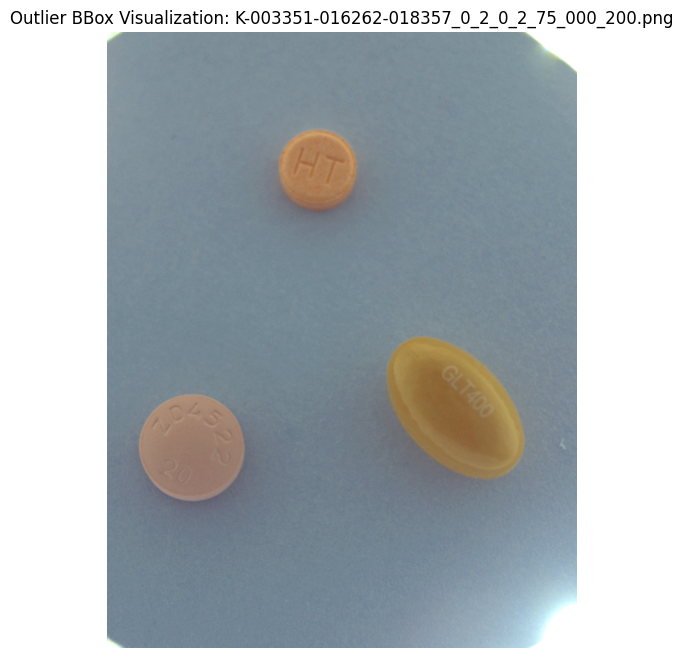


[File: K-003544-004543-012247-016551_0_2_0_2_70_000_200.png | Image Size: 976x1280]
  - Outlier 968: x=653, y=8889, w=217, h=217


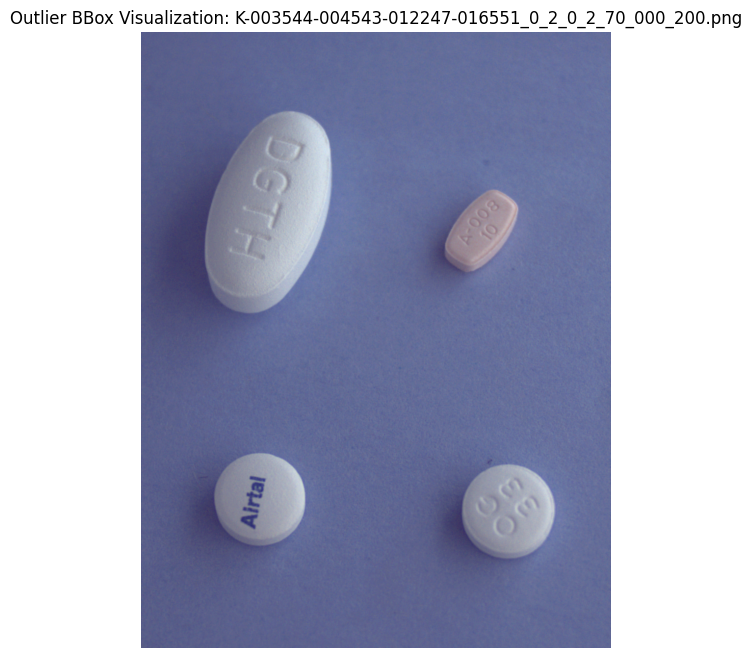

In [49]:
# @title 바운딩 박스 이상치 필터링 및 이상치 이미지 시각화

import matplotlib.pyplot as plt
import os
import cv2


base_image_dir = '/Users/bellboi/data/ai05-level1-project/train_images'

df_temp = df.copy()

# 너비높이 0 보다 작은수 필터링
df_filtered_temp = df_temp[
    (df_temp['bbox_w'] > 0) &
    (df_temp['bbox_h'] > 0)
].copy()

# 바운딩박스 x y축 계산
df_filtered_temp['bbox_x_max'] = df_filtered_temp['bbox_x'] + df_temp['bbox_w']
df_filtered_temp['bbox_y_max'] = df_filtered_temp['bbox_y'] + df_temp['bbox_h']

# 이미지 경계를 벗어나는 데이터 필터링
df_filtered_temp = df_filtered_temp[
    (df_filtered_temp['bbox_x_max'] <= df_filtered_temp['image_width']) &
    (df_filtered_temp['bbox_y_max'] <= df_filtered_temp['image_height'])
]

removed_indices = df_temp.index.difference(df_filtered_temp.index)
df_outliers = df_temp.loc[removed_indices].copy()
outlier_files = df_outliers['image_file_name'].unique().tolist()

df_original_len = len(df)

print(f" 원본갯수 : {df_original_len}")

num_outlier_files = len(outlier_files)
print(f"바운딩 박스가 이상한 json 파일: {num_outlier_files} 개")

MAX_VISUALIZE = 5

for i, file_name in enumerate(outlier_files):
    if i >= MAX_VISUALIZE:
        break

    image_path = os.path.join(base_image_dir, file_name)

    if not os.path.exists(image_path):
        print(f"Warning: Image file not found at path: {image_path}")
        continue

    image = cv2.imread(image_path)

    if image is None:
        print(f"Warning: Could not load image file: {image_path}")
        continue

    outlier_bboxes = df_outliers[df_outliers['image_file_name'] == file_name]

    print(f"\n[File: {file_name} | Image Size: {image.shape[1]}x{image.shape[0]}]")

    for index , row in outlier_bboxes.iterrows():
        x, y, w, h = int(row['bbox_x']), int(row['bbox_y']), int(row['bbox_w']), int(row['bbox_h'])
        print(f"  - Outlier {index}: x={x}, y={y}, w={w}, h={h}")
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(f"Outlier BBox Visualization: {file_name}", fontsize=12)
    plt.axis('off')
    plt.show()
